<a href="https://colab.research.google.com/github/Ms-Gichuhi/house-price-predictions/blob/master/Copy_of_week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definining the question:
You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# The metric for success:
Fit the data in the regression models.

Provide a recommendation based on your analysis.

Evaluation of the models, check the performance of the various regression models and calculate rsmes.


# Experimental design
Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Check for multicollinearity 

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

In [4]:
# Importing the required libraries
# ---
#
import pandas as pd
import numpy as np

# Reading and exploring the dataset.

In [5]:
#loading dataset
house_df = pd.read_csv("house_data.csv")

In [6]:
#previewing first 5 rows
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#previewing last 5 rows
house_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
#checking shape of our datset
house_df.shape

(21613, 20)

In [9]:
#checking datatypes for each column
house_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Finding and dealing with outliers, anomalies, and missing data within the dataset.

In [10]:
#checking for missing values
house_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
print(house_df.duplicated().sum())

3


In [12]:
#dropping columns we will not use
#house_df.columns
house_df = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                    'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']]


# Univariate, bivariate and multivariate analysis.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


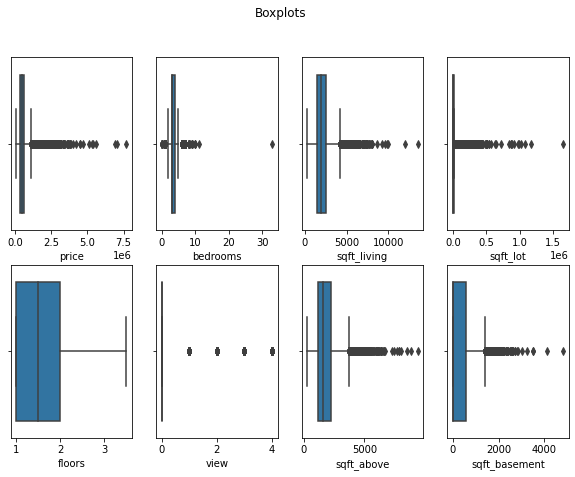

In [13]:
# Checking for Outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(house_df['price'], ax=ax1)
sns.boxplot(house_df['bedrooms'], ax=ax2)
sns.boxplot(house_df['sqft_living'], ax=ax3)
sns.boxplot(house_df['sqft_lot'], ax=ax4)
sns.boxplot(house_df['floors'], ax=ax5)
sns.boxplot(house_df['view'], ax=ax6)
sns.boxplot(house_df['sqft_above'], ax=ax7)
sns.boxplot(house_df['sqft_basement'], ax=ax8)
plt.show()

In [14]:
# checking for anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_price_e = house_df['price'].quantile(.25)
q3_price_e = house_df['price'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_price_e = q3_price_e - q1_price_e

# another way is to find quantiles using the percentiles from the numpy library
q1_p_e, q3_p_e = np.percentile(house_df['price'], [25, 75]) 
# IQR
iqr_p_e = q3_p_e - q1_p_e
print(iqr_p_e, "and", iqr_price_e)



323050.0 and 323050.0


univariate analysis

In [15]:


house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].mean()

price            540182.158793
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
view                  0.234303
sqft_above         1788.390691
sqft_basement       291.509045
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [16]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].median()

price            450000.00
bedrooms              3.00
bathrooms             2.25
sqft_living        1910.00
sqft_lot           7618.00
floors                1.50
view                  0.00
sqft_above         1560.00
sqft_basement         0.00
sqft_living15      1840.00
sqft_lot15         7620.00
dtype: float64

In [17]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,1300.0,0.0,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].std()

price            367362.231718
bedrooms              0.930062
bathrooms             0.770163
sqft_living         918.440897
sqft_lot          41420.511515
floors                0.539989
view                  0.766318
sqft_above          828.090978
sqft_basement       442.575043
sqft_living15       685.391304
sqft_lot15        27304.179631
dtype: float64

In [19]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].var()

price            1.349550e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
view             5.872426e-01
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

In [20]:
# Finding the quantiles of the dataset
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].quantile([0.25,0.5,0.75])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0.25,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,1190.0,0.0,1490.0,5100.0
0.50,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,1560.0,0.0,1840.0,7620.0
0.75,645000.0,4.0,2.50,2550.0,10688.0,2.0,0.0,2210.0,560.0,2360.0,10083.0


In [21]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].skew()


price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
view              3.395750
sqft_above        1.446664
sqft_basement     1.577965
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [22]:
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']].kurt()

price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
view              10.893022
sqft_above         3.402304
sqft_basement      2.715574
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

In [23]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


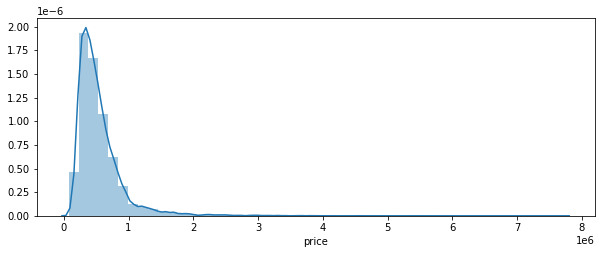

In [24]:
#visualizing house prices
fig = plt.figure(figsize=(10,8))
fig.add_subplot(2,1,1)
sns.distplot(house_df['price'])


In [25]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

bivariate analysis

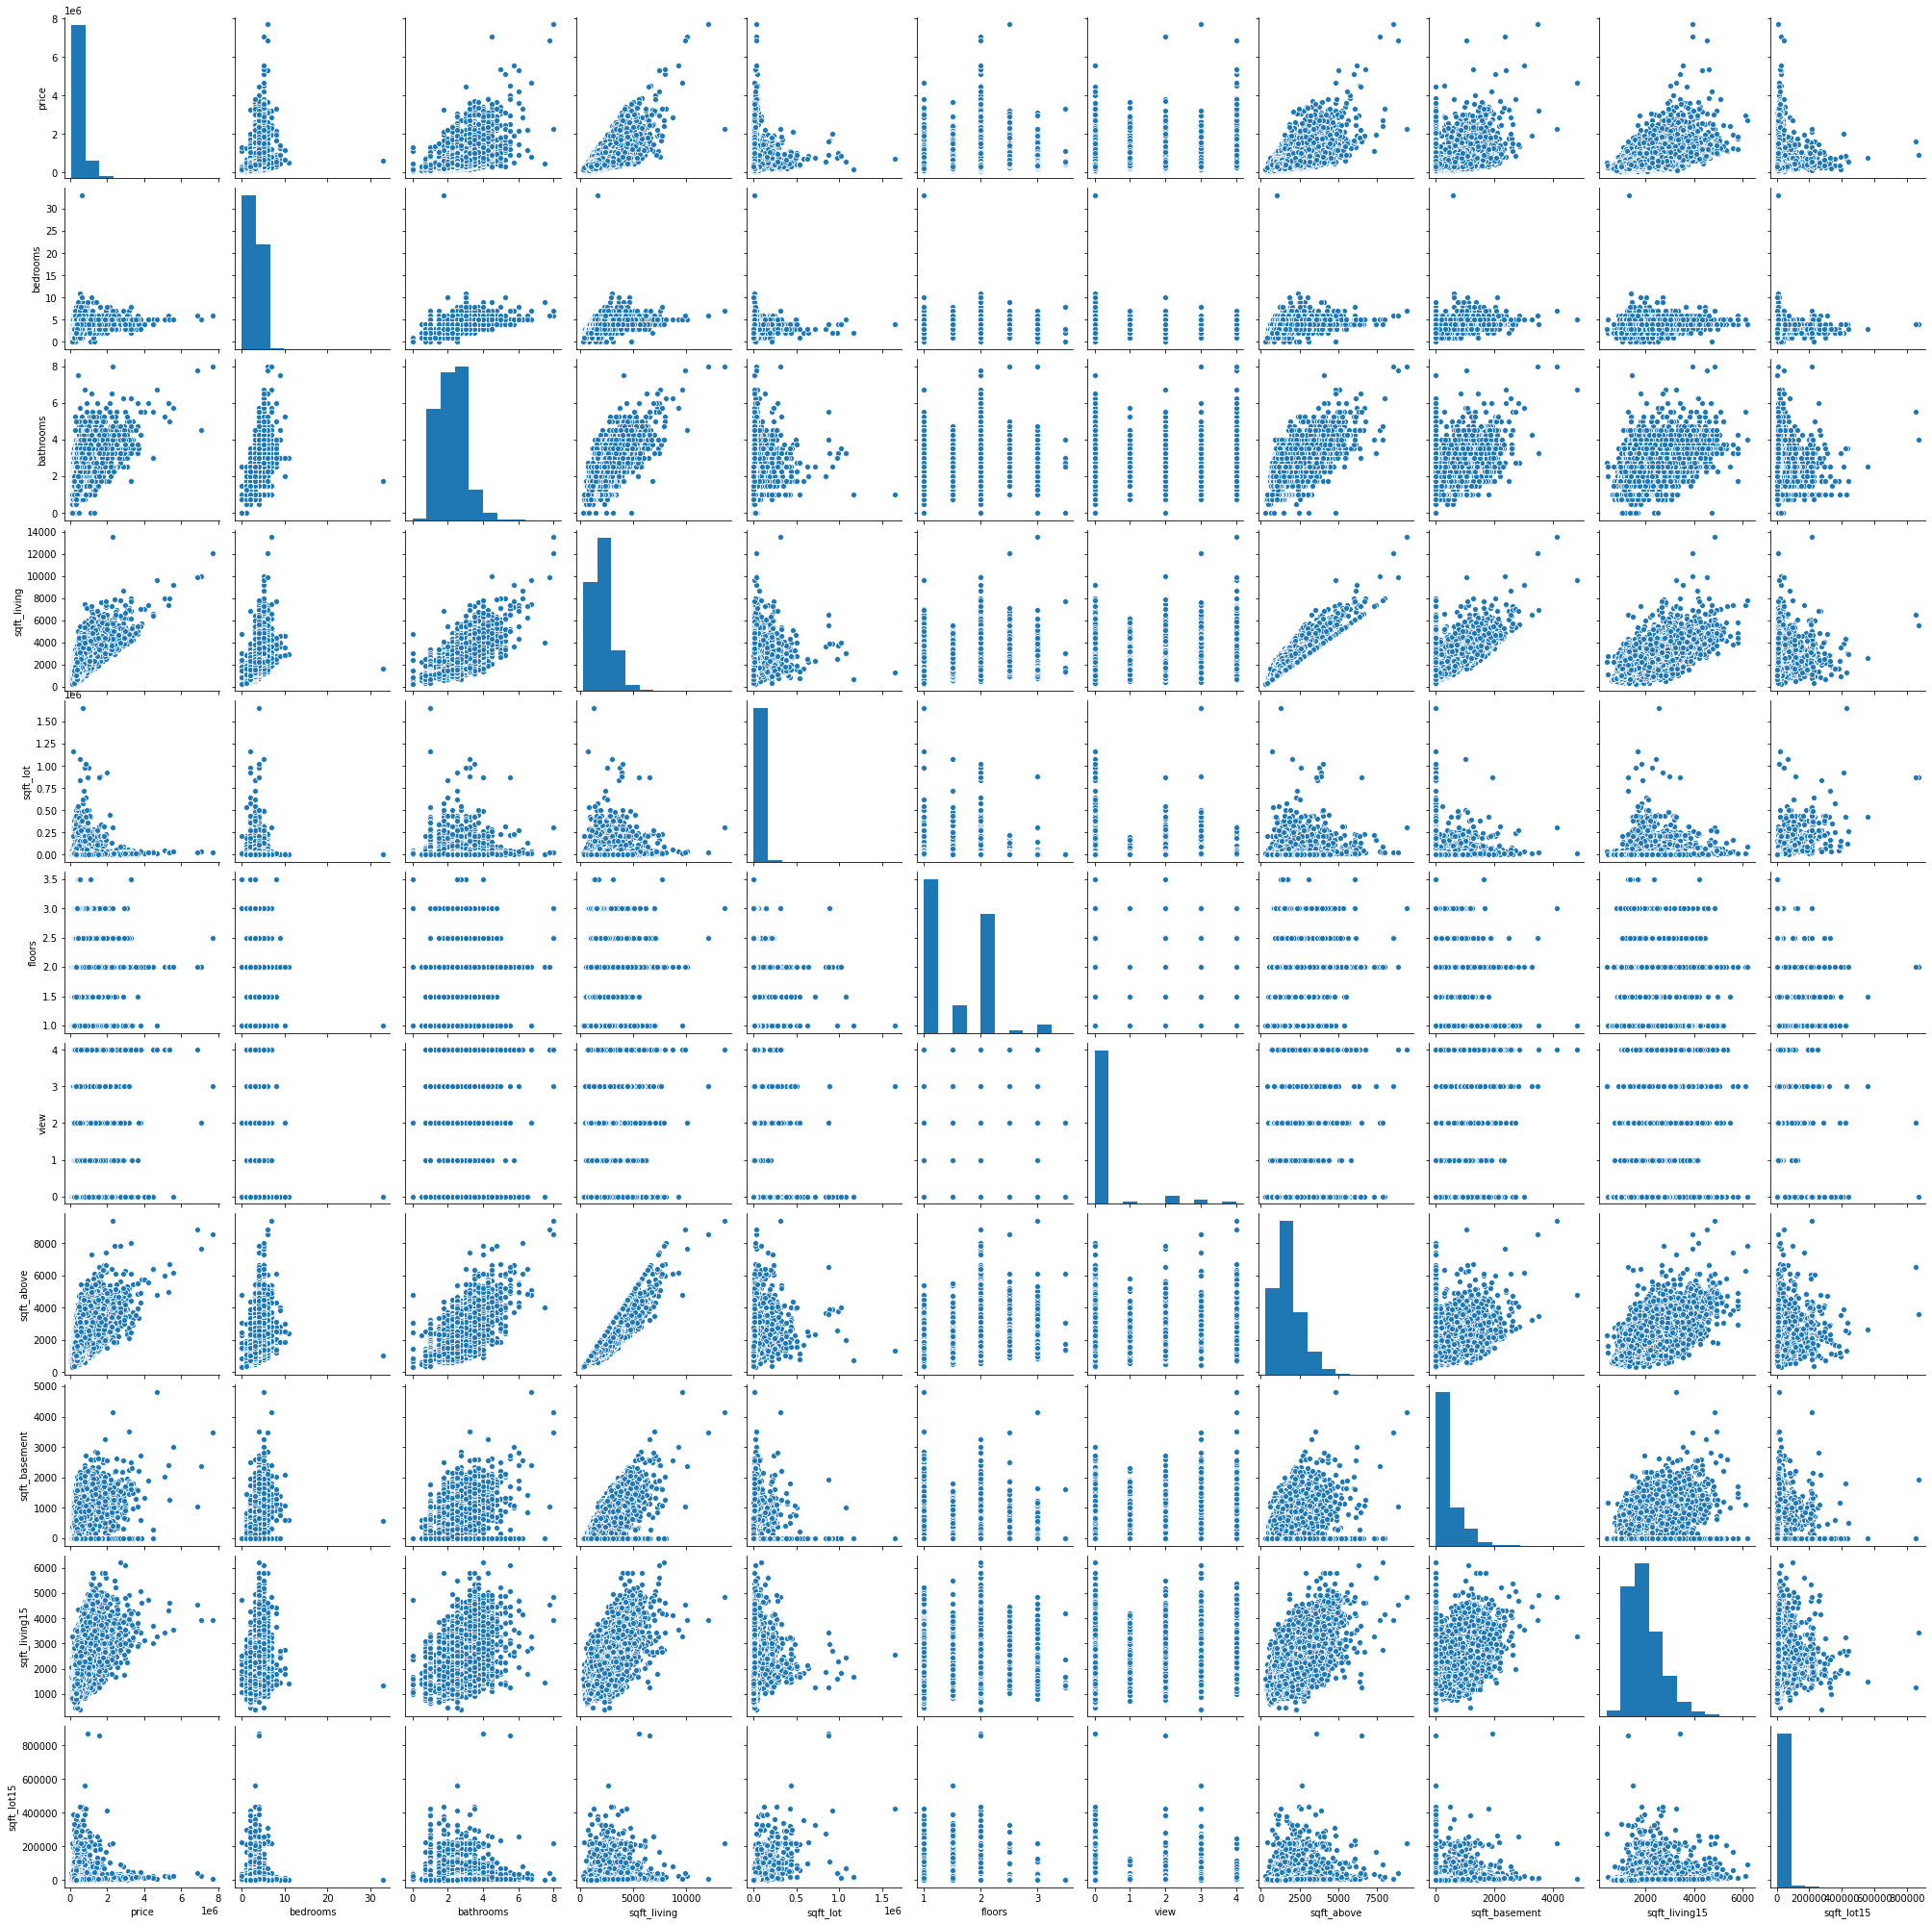

In [26]:

# Ploting the bivariate summaries and recording our observations
#
house = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above',
                    'sqft_basement','sqft_living15', 'sqft_lot15']]
sns.pairplot(house)
plt.show()

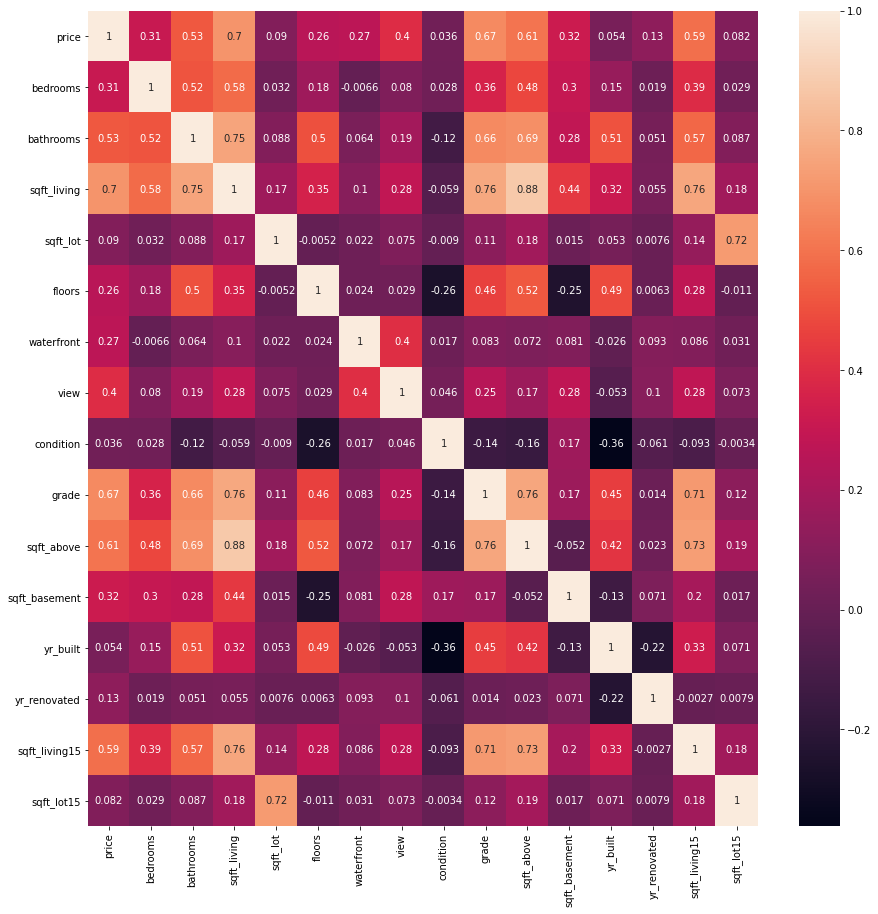

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(house_df.corr(), annot = True)

multivariate analysis

In [28]:

df = house_df.drop(['price'], axis=1)

In [29]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
#The p vlaue is 0 the observed matrix is not an identity matrix.

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [30]:
# Creating factor analysis object and perform factor 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df,15, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here, we can see only for 5-factors eigenvalues are greater than one. 
# It means we need to choose only 5 factors (or unobserved variables).

,Original_Eigenvalues
0,4.993788e+00
1,1.963038e+00
2,1.674079e+00
3,1.292319e+00
4,1.027701e+00
5,8.436898e-01
6,6.858659e-01
7,6.061855e-01
8,5.268530e-01
9,4.008302e-01


In [31]:
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for sqft_above,sqft_living,grade, bathrooms and sqft_living15(sqft)
# Factor 2 has high factor loadings for year_built, bathrooms and floors(age)
# Factor 3 has high factor loadings for sqft_lot , sqft_lot15, sqft_living(renovations)
# Factor 4 has high factor loadings for water-front,grade, view,sqft_living (preferences)
# Factor 5 has high factor loadings for bedrooms,condition,sqft_basement,sqft_living(interiors)

,Factor1,Factor2,Factor3,Factor4,Factor5
bedrooms,0.571710,-0.037591,-0.020386,-0.068235,0.199789
bathrooms,0.770658,0.282392,0.007368,0.079112,0.134500
sqft_living,0.958718,-0.000135,0.112257,0.126091,0.193333
sqft_lot,0.085980,0.001896,0.766976,0.027782,-0.002752
floors,0.445334,0.386655,-0.067112,0.039317,-0.319924
waterfront,0.030107,-0.025722,0.011834,0.498554,0.000093
view,0.169499,-0.075886,0.046177,0.775928,0.128493
condition,-0.089639,-0.332653,0.007603,-0.006693,0.179792
grade,0.778776,0.216946,0.055949,0.183350,-0.028264
sqft_above,0.929693,0.093831,0.130314,0.063396,-0.292259


In [32]:
#Getting variance of each factors
# 
fa.get_factor_variance()

# Noting total 61.77% cumulative Variance explained by the 5 factors.
# We conclude that the we have found 5 factors that contribute highly to the price of a country.
# 

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,4.286018,1.357279,1.496768,0.991808,1.134427
Proportion Var,0.285735,0.090485,0.099785,0.066121,0.075628
Cumulative Var,0.285735,0.376220,0.476004,0.542125,0.617753


# Check of multicollinearity

In [33]:
house_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [34]:
#to focus on our independent variables only.
independent_only = house_df.drop('price',axis =1)

#displaying the correlations between the variables
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050


In [35]:
#calculating the VIF from the correlation above
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# If VIF = 1, a variable  is not correlated with any other independent variable. 
#As a rule of thumb, multicollinearity is a potential problem when VIF is greater than 4; and,
# a serious problem when it is greater than 10. The output below shows a VIF of greater than 4 for: 
#sqft living, sqft basemsnt and sqft above having very high multicollinearity.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644100,-0.460756,-1.946408e-01,0.044613,0.070495,0.061553,0.117238,-0.065090,0.326360,-7.144343e-01,-3.850833e-01,0.092786,0.039624,0.012394,0.082102
bathrooms,-0.460756,3.347865,-5.059371e+00,-0.019235,-0.681459,0.009193,-0.038569,-0.136328,-0.288383,3.308153e+00,1.355997e+00,-0.916265,-0.257377,0.096078,0.076647
sqft_living,-0.188712,-5.065810,-3.387473e+13,-0.127309,0.512440,0.455830,-0.603304,-0.353099,-0.766022,3.054236e+13,1.632343e+13,1.666256,0.065540,-0.983296,-0.194080
sqft_lot,0.044613,-0.019235,-1.269571e-01,2.088121,0.074269,0.028201,-0.051921,0.019180,-0.006188,-1.207938e-01,3.950075e-02,0.026167,0.012555,0.127203,-1.474750
floors,0.070495,-0.681459,5.086098e-01,0.074269,1.931951,-0.003745,-0.063278,0.132731,-0.326791,-8.955088e-01,3.171106e-01,-0.301643,-0.057515,0.358900,0.101125
waterfront,0.061553,0.009193,4.561620e-01,0.028201,-0.003745,1.203090,-0.493279,-0.015109,0.047894,-5.208518e-01,-2.233512e-01,-0.021863,-0.065741,0.057360,-0.016921
view,0.117238,-0.038569,-6.032284e-01,-0.051921,-0.063278,-0.493279,1.404261,-0.008449,-0.184212,5.906507e-01,1.919544e-02,0.198828,-0.035142,-0.264402,0.001930
condition,-0.065090,-0.136328,-3.534669e-01,0.019180,0.132731,-0.015109,-0.008449,1.221646,-0.016421,3.509341e-01,9.891804e-02,0.472716,0.194776,0.036010,-0.037954
grade,0.326360,-0.288383,-7.612812e-01,-0.006188,-0.326791,0.047894,-0.184212,-0.016421,3.234590,-7.967213e-01,-1.884461e-01,-0.397215,-0.040709,-0.828841,0.120063
sqft_above,-0.715302,3.308713,3.054236e+13,-0.120485,-0.899355,-0.520590,0.590673,0.350403,-0.791686,-2.753782e+13,-1.471765e+13,-1.155562,-0.081341,-0.724371,-0.038865


From the above test we will drop the variables with high multicollinearity. our assumption is that since there are renovations that happened and they affected the sqft living,then the previous records of sqft living do not affect price od houses as the new measures for sqft living15 are already in place. another thing to note is : sqft living = sqft basement + sqft above.

# Performing regression analysis.

# Multiple linear regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
#we did the milti linear beore droping the columns with high colinearity just to see how the model perfoms under both circumstances
X = house_df.drop('price',axis =1).values
y = house_df['price'].values

In [38]:
#splitting Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [39]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [40]:
#Multiple Liner Regression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#display the intercept / bias and coefficient

print(regressor.intercept_)
print("......................................")
print(regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(X_test)


539618.1337828015
......................................
[ -42454.73981837   37457.60571684   77821.42983377   -1660.31449189
   13707.92407925   51307.55728956   33026.02275215   12321.86011751
  138554.64411434   66745.15115196   36716.29234946 -105692.98531723
    6131.07668899   19610.01529484  -13632.94496645]


In [41]:
#comparing our predicted results to the actual data from the test set
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,6.484000e+03,6.484000e+03
mean,5.414982e+05,5.409734e+05
std,3.588041e+05,3.007191e+05
min,7.800000e+04,-9.448283e+05
25%,3.250000e+05,3.360317e+05
50%,4.550000e+05,4.794880e+05
75%,6.546125e+05,6.739927e+05
max,5.570000e+06,3.232186e+06


In [42]:
# evaluate the performance of the algorithm using MAE, MSE, RMSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 138430.40260024375
Mean Squared Error: 44088739608.76448
Root Mean Squared Error: 209973.18783302902


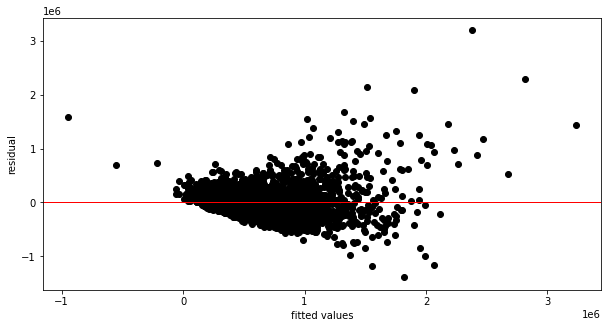

In [43]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth=1)
plt.show()

From the visualization of  the residuals we see that it's normally distributed, therefore there is proof of price of housing having linear relationship with the dependent variable.

In [45]:
#after droping the columns with high multicollinearity
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [46]:
x = house_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_living15','sqft_lot15']]
y = house_df['price'].values

In [47]:
#splitting Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [48]:
x_train = s_scaler.fit_transform(x_train.astype(np.float))
x_test = s_scaler.transform(x_test.astype(np.float))

In [49]:
#Multiple Liner Regression

regressor = LinearRegression()  
regressor.fit(x_train, y_train)

#display the intercept / bias and coefficient

print(regressor.intercept_)
print("......................................")
print(regressor.coef_)

#predicting the test set result
y_pred = regressor.predict(x_test)

539618.1337828015
......................................
[ -10003.05002518   88320.7863669     3944.02125707   11154.35866324
   53444.92301359   39497.56313981   12984.46285923  184165.51486177
 -121351.59719734    7018.92734574   61270.36119476   -7562.50931601]


In [50]:
#comparing our predicted results to the actual data from the test set
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,6.484000e+03,6.484000e+03
mean,5.414982e+05,5.408026e+05
std,3.588041e+05,2.935564e+05
min,7.800000e+04,-7.894242e+05
25%,3.250000e+05,3.406849e+05
50%,4.550000e+05,4.872916e+05
75%,6.546125e+05,6.707847e+05
max,5.570000e+06,2.639826e+06


In [51]:
# evaluate the performance of the algorithm using MAE, MSE, RMSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 141955.8400740494
Mean Squared Error: 48092504868.44357
Root Mean Squared Error: 219300.03389977754


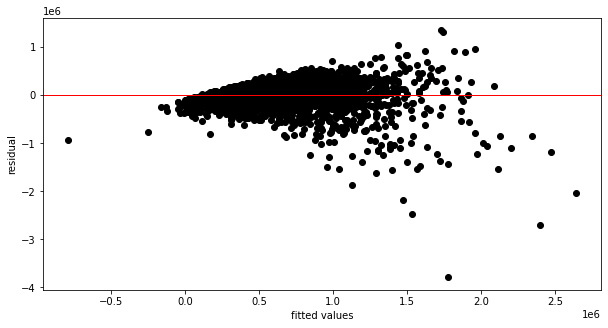

In [52]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = y_pred - y_test

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth=1)
plt.show()

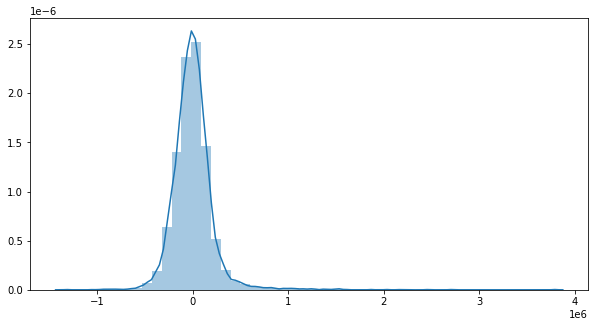

In [53]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

from the above the RSMes for the model under the 2 circumstances has a slight difference.
whether we drop them or not the model sort of performs the same.

In [54]:

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

print(p_value)
print("...............................................")

if (test_result > critical_value):
  print('The variances are unequal, and the model needs to be reassessed')
else:
  print('The variances are homogeneous!')

inf
3.412297688464905e-120
...............................................
The variances are homogeneous!


Quantile Regression

In [55]:
#defining the predictor variables and the target variable
X = house_df.drop(['price'],axis=1)
y = house_df['price']

In [86]:
X.shape

(21613, 15)

In [87]:
#Defining the mean and standard deviation of our extra array

mean ,sigma = 0, 0.001
#Generating a normal random variables with the same shape as our dataset
noise = np.random.normal(mean, sigma , [21613,15])
#Adding the noise to our predictor variables
X = X + noise


In [88]:
# We will use the python package statsmodels for Quantile Regression
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('y ~ X', house_df)
res = mod.fit(q=.5)

print(res.summary())
 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3923
Model:                       QuantReg   Bandwidth:                   2.435e+04
Method:                 Least Squares   Sparsity:                    3.459e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21613
Time:                        14:31:40   Df Residuals:                    21597
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     3.2e+06   1.11e+05     28.882      0.000    2.98e+06    3.42e+06
X[0]       -2.133e+04   1622.105    -13.149      0.000   -2.45e+04   -1.81e+04
X[1]        4332.5772   2795.251      1.550      0.121   -1146.322    9811.476
X[2]        3093.4286     55.234     56.006      0.0

# Ridge Regression

In [91]:
from sklearn.linear_model import Ridge
X = house_df.drop('price',axis =1)
y = house_df['price']

In [58]:
#Fitting the X and y variables in a ridge regression.

ridge = Ridge(normalize=True)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [59]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
from sklearn.metrics import mean_squared_error
baseline_model = (np.sqrt(mean_squared_error(y_true = y, y_pred = ridge.predict(X))))

print(baseline_model)

237018.79108001094


In [60]:
#Establish training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [61]:
#we defined the lambda variable as alpha and We want the log of -5 to 2 values and used the mean sqaured error
#as the value to look at.
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid = {'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [62]:
# We now use the .fit function to run the model 

search.fit(X,y)
#we search for the best params
print(search.best_params_)

abs(search.best_score_) 

{'alpha': 0.01}


47378939173.13877

The best_params_ tells us what to set alpha too which in this case is       0.01. 

The best_score_ tells us what the best possible mean squared error is. 

In this case, the value of 47378939173.13 is way worse than what the baseline model was. 


In [63]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
print("...........................................")

second_model = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = ridge.predict(X_test))))
#second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

...........................................
217201.36796653847


these results indicate that there is a difference between the ridge and baseline models. 

This means that the penalization made a huge difference with this dataset.

In [64]:
# The 217201.3 is lower than the 237018.7. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is a significant difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 

coef_dict_baseline = {}
for coef,feat in zip(ridge.coef_,X.columns):
  coef_dict_baseline[feat] = coef 
coef_dict_baseline
# The coefficient values are about the same. This means that the penalization made a difference with this dataset.

{'bathrooms': 45088.079226600654,
 'bedrooms': -38187.889895827124,
 'condition': 20068.48057301749,
 'floors': 27165.389804691356,
 'grade': 117084.52961143092,
 'sqft_above': 77.47763794070512,
 'sqft_basement': 84.17837530119043,
 'sqft_living': 82.53060524268909,
 'sqft_living15': 27.220675484611437,
 'sqft_lot': -0.002677070325876967,
 'sqft_lot15': -0.5423307954658462,
 'view': 43845.70264995107,
 'waterfront': 574076.4553507095,
 'yr_built': -3487.33631081896,
 'yr_renovated': 11.712707244842843}

In [65]:
#Finding out the score of the ridge regression model
ridge.score(X_test,y_test) 

0.6676940658340551

# Lasso regression

In [66]:
#Defining the predictor variables and the target variable.
X = house_df.drop(['price'],axis=1)
Y = house_df['price']

In [67]:
#Importing the Lasso regression
from sklearn import linear_model

lasso = linear_model.Lasso()

#Fitting our data in a lasso regression
lasso.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463496632911409.75, tolerance: 291664766083.6765
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
#finding mean squared error
print('lasso RMSE: ', np.sqrt(mean_squared_error(Y, lasso.predict(X))))

lasso RMSE:  216152.97019324263


In [69]:
#split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)


parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

In [70]:
#Grid Searching for the best parameters
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

#Fitting the hyperparameters on a lasso model
gridlasso.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [71]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, Y_train) 
linear.fit(X_train, Y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, Y_test))
print("linear score:", linear.score(X_test, Y_test)) 
print("lasso MSE:", mean_squared_error(Y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(Y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6664106003517187
linear score: 0.6664479073658366
lasso MSE: 47358643827.25562
linear MSE: 47353347467.132286
lasso best estimator coef: [-4.05606748e+04  3.95787395e+04  2.97419817e+02  2.08653205e-02
  3.05455215e+04  5.45936693e+05  4.23612111e+04  2.25145873e+04
  1.20165086e+05 -1.35606765e+02 -1.30680839e+02 -3.54266853e+03
  9.51899001e+00  2.67636886e+01 -5.46249821e-01]
linear coef: [-4.05941994e+04  3.96783568e+04  1.09470857e+02  2.10511632e-02
  3.06496261e+04  5.49440752e+05  4.22283304e+04  2.25788958e+04
  1.20193368e+05  5.22396640e+01  5.72311930e+01 -3.54382443e+03
  9.45910521e+00  2.67770303e+01 -5.46247580e-01]


In [72]:
#Fitting the hyperparameters on a lasso regression model
lasso = linear_model.Lasso(normalize=True,alpha=29.0)
lasso.fit(X_train,Y_train)
print('lasso RMSE: ',np.sqrt(mean_squared_error(Y_test,gridlasso.predict(X_test))))


lasso RMSE:  217620.4122486115


In [73]:
#Finding out the score of the lasso regression model
lasso.score(X_test,Y_test) 

0.6645261104338493

In [74]:
#Printing out the columns and the respective coefficients.
coef_dict_baseline = {}
for coef,feat in zip(lasso.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 31796.41414573225,
 'bedrooms': -29079.648390378636,
 'condition': 17070.357434731555,
 'floors': 20520.138748872738,
 'grade': 120013.4441216774,
 'sqft_above': 0.0,
 'sqft_basement': 0.0,
 'sqft_living': 158.9152199851177,
 'sqft_living15': 21.003552263458854,
 'sqft_lot': -0.0,
 'sqft_lot15': -0.3574053263664291,
 'view': 42925.720891418416,
 'waterfront': 524333.7224061255,
 'yr_built': -3284.981670488828,
 'yr_renovated': 5.254811887994358}

The Lasso regression does better because of feature selection.In our data the sqft_above, sqft_basement, sqft_lot were reduced out of our model. Lasso does shrinkage and variable selection of the pairwise correlations simultaneously for better prediction and model interpretation.


# Elastic Net Regression

In [75]:
from sklearn.linear_model import ElasticNet
X = house_df.drop(['price'],axis=1)
y = house_df['price']

In [76]:
elastic = ElasticNet(normalize=True)
elastic.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 


46722106361.99094


In [78]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 45769.02689271932,
 'bedrooms': -39338.46999528524,
 'condition': 19535.27564942823,
 'floors': 26894.06313924224,
 'grade': 119825.78117062595,
 'sqft_above': 51.54903682235454,
 'sqft_basement': 57.79034161311938,
 'sqft_living': 109.33937825817702,
 'sqft_living15': 24.85723288304871,
 'sqft_lot': -0.0018677648113225587,
 'sqft_lot15': -0.5504466554157261,
 'view': 43299.93436269667,
 'waterfront': 579131.8850350841,
 'yr_built': -3572.820762579031,
 'yr_renovated': 10.167037422676941}

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

#Searching for the best parameters for both parameters
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [80]:
#fitting our model and displaying the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


47428950422.99371

In [81]:
#Fitting the best parameters to our model
elastic = ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
#Printing out the MSE score of our tuned model
print('Elastic Net RMSE:' ,np.sqrt(mean_squared_error(y_true = y_test,y_pred=elastic.predict(X_test))))

Elastic Net RMSE: 217858.580441249


In [83]:
#Printing out the coefficients for our predictor variables.
coef_dict_baseline = {}
for coef,feat in zip(elastic.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 38324.892713327754,
 'bedrooms': -36789.36090236122,
 'condition': 24010.495787289845,
 'floors': 30980.461594216515,
 'grade': 112070.78278891594,
 'sqft_above': 76.60968285188274,
 'sqft_basement': 82.65403156182089,
 'sqft_living': 81.904162832274,
 'sqft_living15': 33.51154613207339,
 'sqft_lot': 0.016518580248790955,
 'sqft_lot15': -0.5156254321794411,
 'view': 43833.87599544636,
 'waterfront': 535410.7985138525,
 'yr_built': -3288.9699778209692,
 'yr_renovated': 13.887487255285468}

In [84]:
#how our model best fits our data?
elastic.score(X_test,y_test)

0.6656800267843603

the multi linear regression worked well with predicting , the other models scores were almost similar though they had very high rsmes.



